# Analytics

#### Date: 2021/01

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM: SysArq

##### Semester: 2021/01
##### Professor: Hilmer Neri

##### Members:

- Joao Gabriel Rossi
- Paulo Vitor Coelho
- Joao Matheus
- Ivan Diniz Dobbin
- Gabriel Marcolino
- Carlos Eduardo Roriz
- Lorenzo Santos

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Datetime
from datetime import datetime

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [4]:
jsons = glob('../analytics-raw-data/*.json') # add the path here

In [5]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"PC-GO1-(.*?)-*-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [6]:
base_component_df = create_base_component_df(jsons)

In [7]:
base_component_df.head(10)

,bestValue,metric,value,filename,repository,version
18,True,duplicated_lines_density,0.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
19,NaN,functions,41,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
20,True,security_rating,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
21,NaN,files,16,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
22,NaN,complexity,42,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
23,NaN,ncloc,878,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
24,False,coverage,97.3,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
25,True,reliability_rating,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
26,False,comment_lines_density,7.7,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
54,True,duplicated_lines_density,0.0,fga-eps-mds-2021_1-PC-GO1-Archives-13-09-2021-...,Archives,13-09-2021-15-00


#### Create dataframe per file

In [8]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [9]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns, dtype=object)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)
        
        file_component_df_py = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'py')
        file_component_df_js = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'js')

        file_component_df_py['filename'] = os.path.basename(i)
        file_component_df_js['filename'] = os.path.basename(i)

        df = df.append(file_component_df_js, ignore_index=True)
        df = df.append(file_component_df_py, ignore_index=True)
          
    aux_df = df['filename'].str.split(r"PC-GO1-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [10]:
file_component_df = create_file_df(jsons)

In [11]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
131,archives_app/migrations/0001_initial.py,0,0,1.2,0.0,0.0,85,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
132,archives_app/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
133,archives_app/migrations/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
134,project/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
135,archives_app/admin.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
136,archives_app/apps.py,0,0,0.0,0.0,100.0,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
137,project/asgi.py,0,0,66.7,0.0,NaN,4,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
138,manage.py,1,2,16.7,0.0,NaN,15,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
139,archives_app/models.py,0,0,0.0,0.0,100.0,39,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
140,archives_app/serializers.py,0,0,0.0,0.0,100.0,65,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47


#### Create dataframe per repository

In [12]:
archives_df = file_component_df[file_component_df['repository'] == 'Archives']
profile_df = file_component_df[file_component_df['repository'] == 'Profile']
frontend_df = file_component_df[file_component_df['repository'] == 'Frontend']

In [13]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

### Measure calculations accordng to Q-Rapids quality model

# Quality Aspect - Maintainability

## Factor - Code Quality 

### Metric calculations

##### COMPLEXITY

In [356]:
def m1(df):
    """
    Is better to have more functions than less functions but more complex ones with greater number of paths
    m1 = 1 is the best possible result
    """
    density_non_complex_files = len(df[((df['complexity'].astype(float)/df['functions'].astype(float)) < 10) | (df['functions'].astype(int) == 0).all()])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [357]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [358]:
def m3(df):
    """
    Is better to have less duplicated lines
    m3 = 1 is the best possible result
    """
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

# Quality Aspect - Reliability

## Factor - Testing Status

##### Passed tests

In [359]:
def m4(df):
    """
    m4 = 1 is the optimal result
    """
    passed_tests = df['test_success_density'].astype(float).median() / 100

    return passed_tests

#### Fast test builds

In [360]:
def m5(df):
    """
    m5 = 1 is the optimal result
    """
    density_fast_test_builds = len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))

    return density_fast_test_builds

#### Test coverage

In [361]:
def m6(df):
    """
    m6 = 1 is the optimal result
    """
    density_test_coverage = len(df[(df['coverage'].astype(float) > 60)]) / len(df)

    return density_test_coverage


### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [362]:
def drop_unnecessary_files(df):
    new_df = df[~df['path'].str.contains('test')]
    new_df = new_df[~new_df['path'].str.contains('init')]
    new_df = new_df[~new_df['path'].str.contains('manage')]
    new_df = new_df[~new_df['path'].str.contains('asgi')]
    new_df = new_df[~new_df['path'].str.contains('wsgi')]
    new_df = new_df[~new_df['path'].str.contains('admin')]
    return new_df

In [363]:
new_archives_df = drop_unnecessary_files(archives_df)
new_frontend_df = drop_unnecessary_files(frontend_df)
new_profile_df = drop_unnecessary_files(profile_df)

In [364]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m4(version_df))
        m6_list.append(m6(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m4_list,
                               'm6': m6_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [365]:
archives_metrics = create_metrics_df(new_archives_df)
profile_metrics = create_metrics_df(new_profile_df)
frontend_metrics = create_metrics_df(new_frontend_df)

### Data visualization

- You must do this for each of your repositories

# ARCHIVES

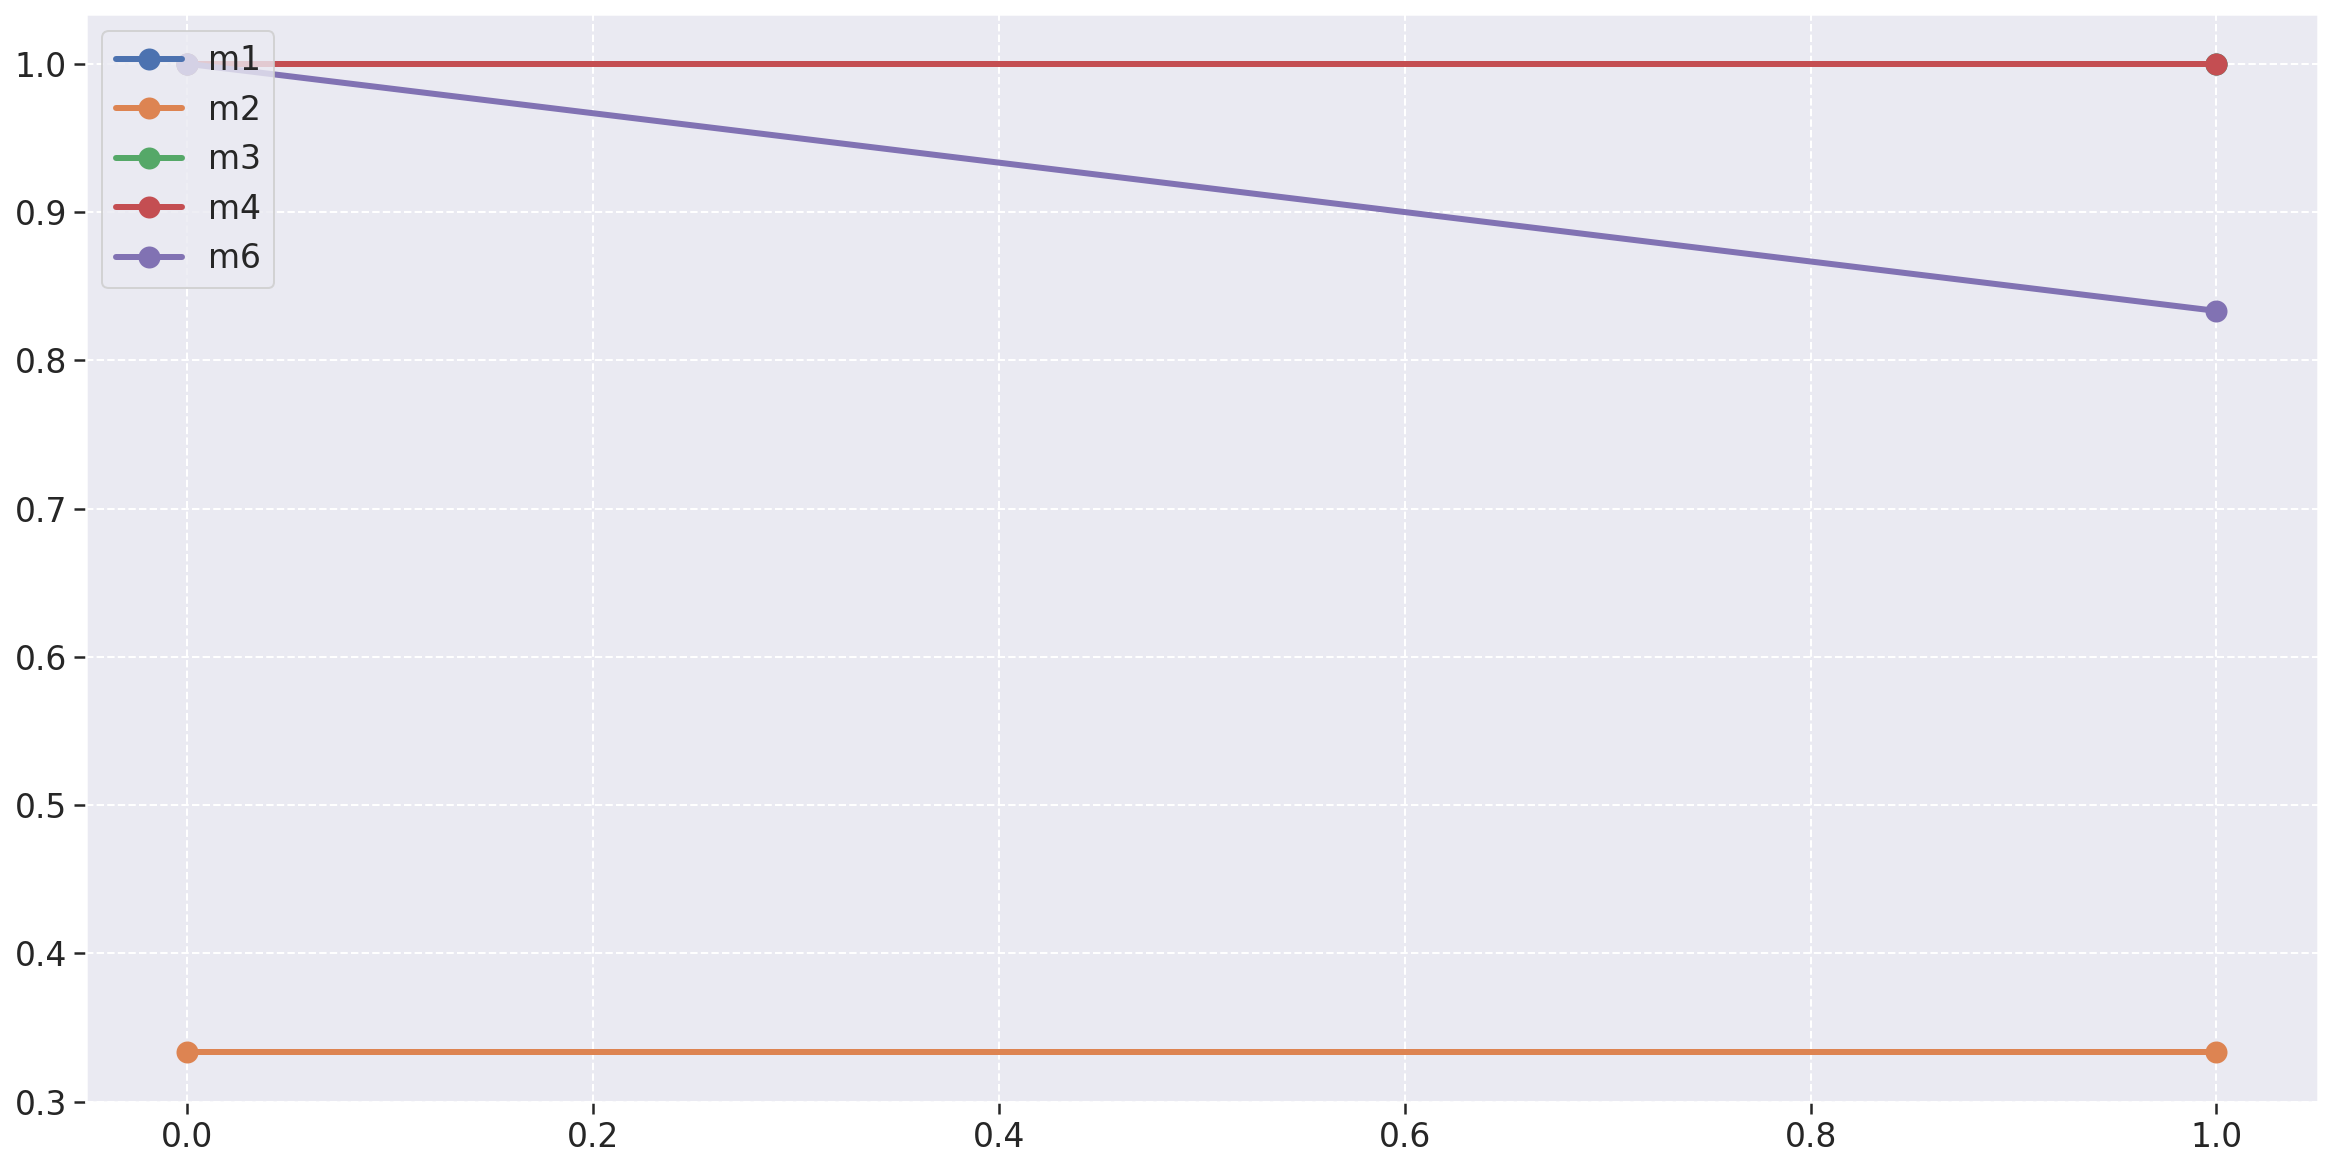

In [366]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['m1'], linewidth=3, marker='o', markersize=10, label='m1')
plt.plot(archives_metrics['m2'], linewidth=3, marker='o', markersize=10, label='m2')
plt.plot(archives_metrics['m3'], linewidth=3, marker='o', markersize=10, label='m3')
plt.plot(archives_metrics['m4'], linewidth=3, marker='o', markersize=10, label='m4')
plt.plot(archives_metrics['m6'], linewidth=3, marker='o', markersize=10, label='m6')

plt.legend(loc='upper left')

# Profile

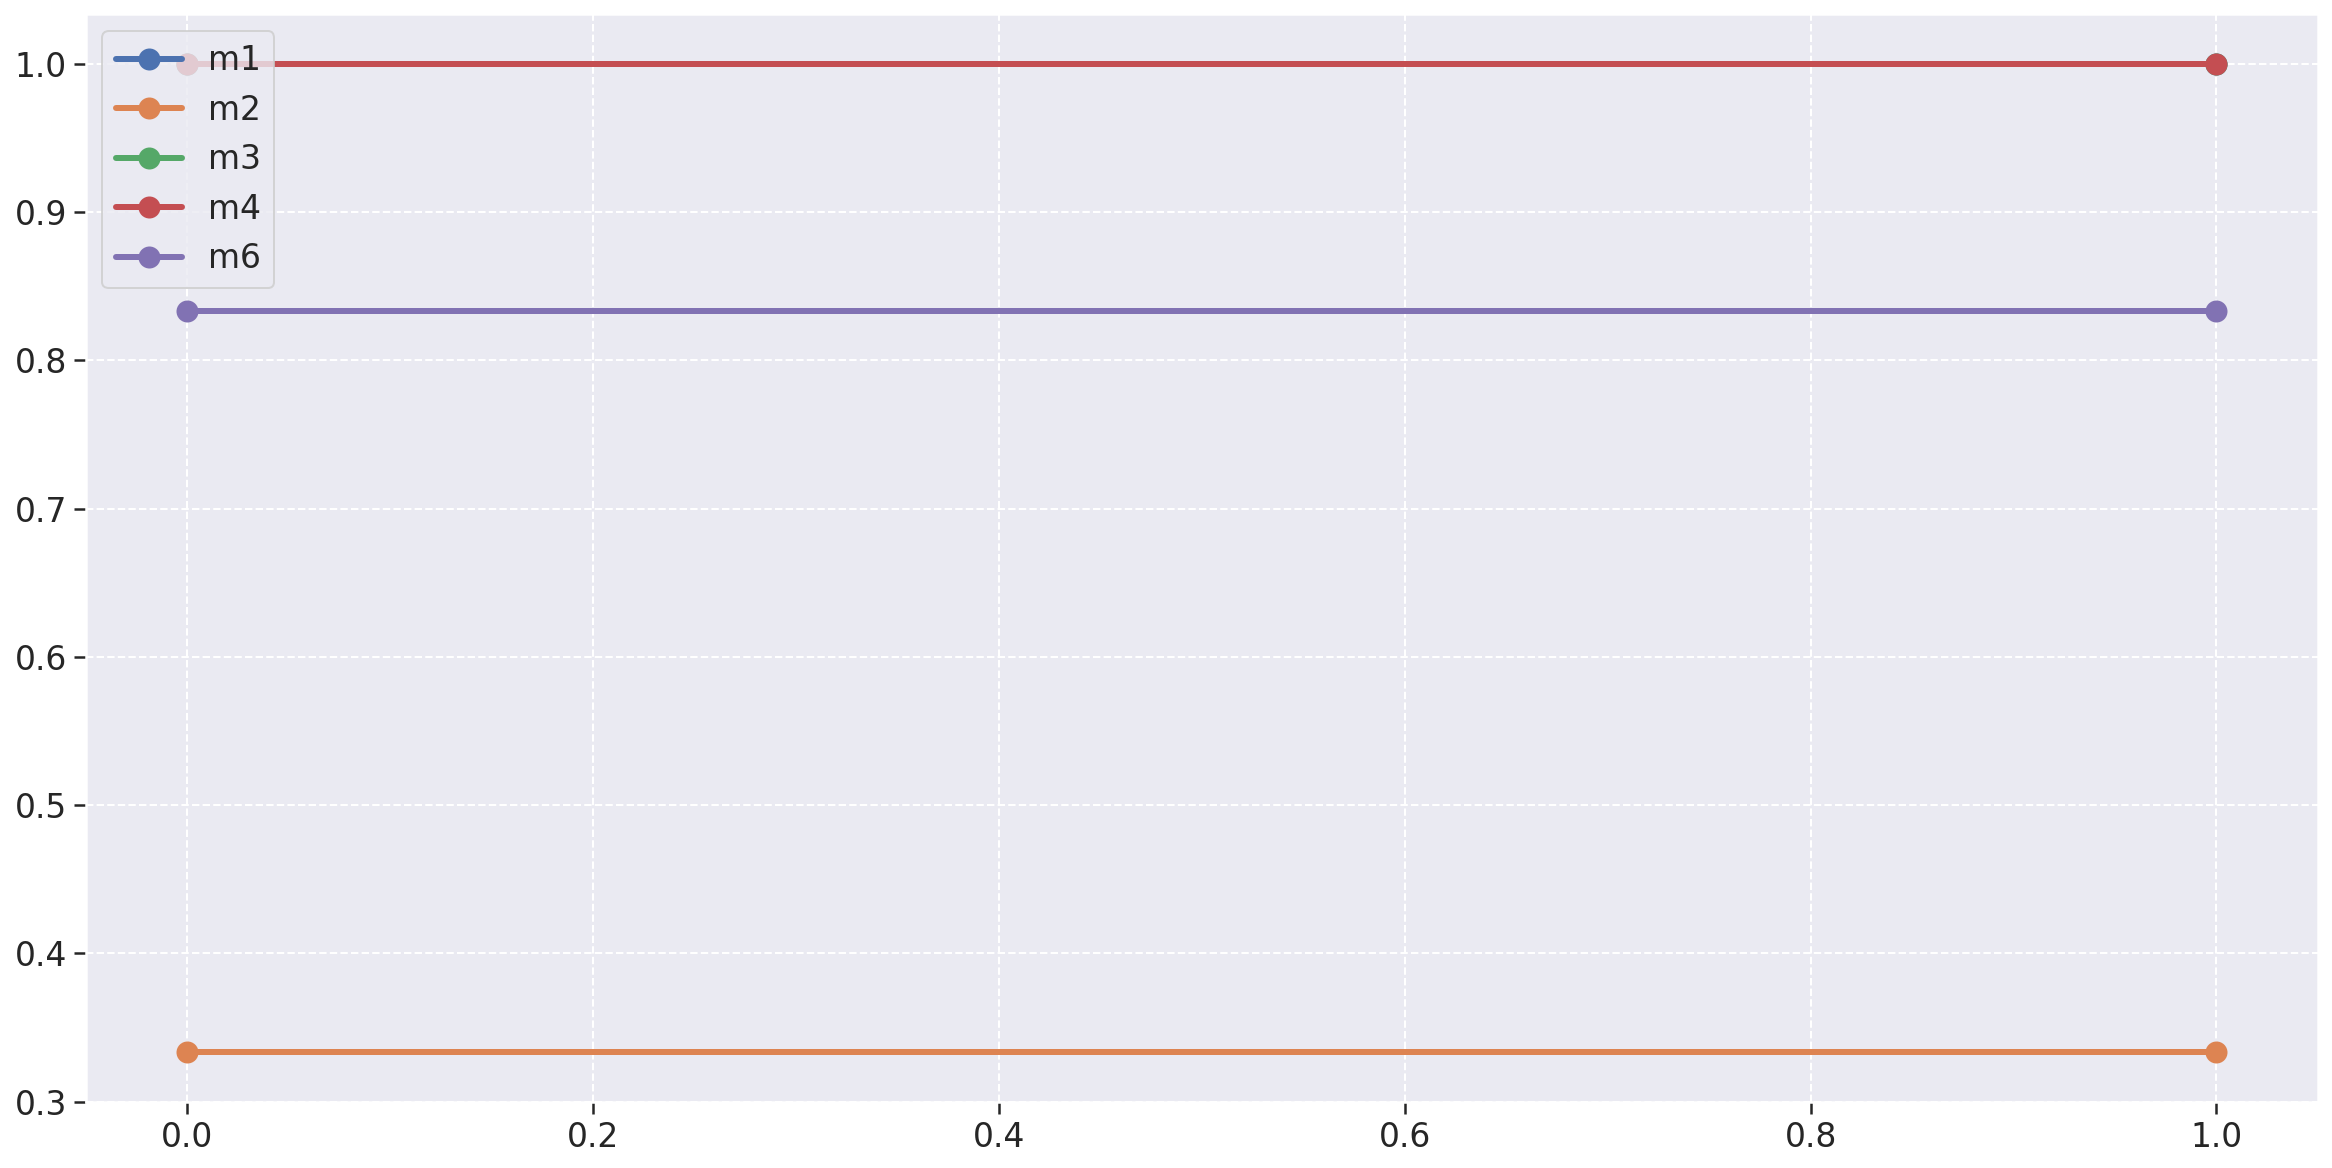

In [367]:
fig = plt.figure(figsize=(20, 10))

plt.plot(profile_metrics['m1'], linewidth=3, marker='o', markersize=10, label='m1')
plt.plot(profile_metrics['m2'], linewidth=3, marker='o', markersize=10, label='m2')
plt.plot(profile_metrics['m3'], linewidth=3, marker='o', markersize=10, label='m3')
plt.plot(profile_metrics['m4'], linewidth=3, marker='o', markersize=10, label='m4')
plt.plot(profile_metrics['m6'], linewidth=3, marker='o', markersize=10, label='m6')

plt.legend(loc='upper left')

# Frontend

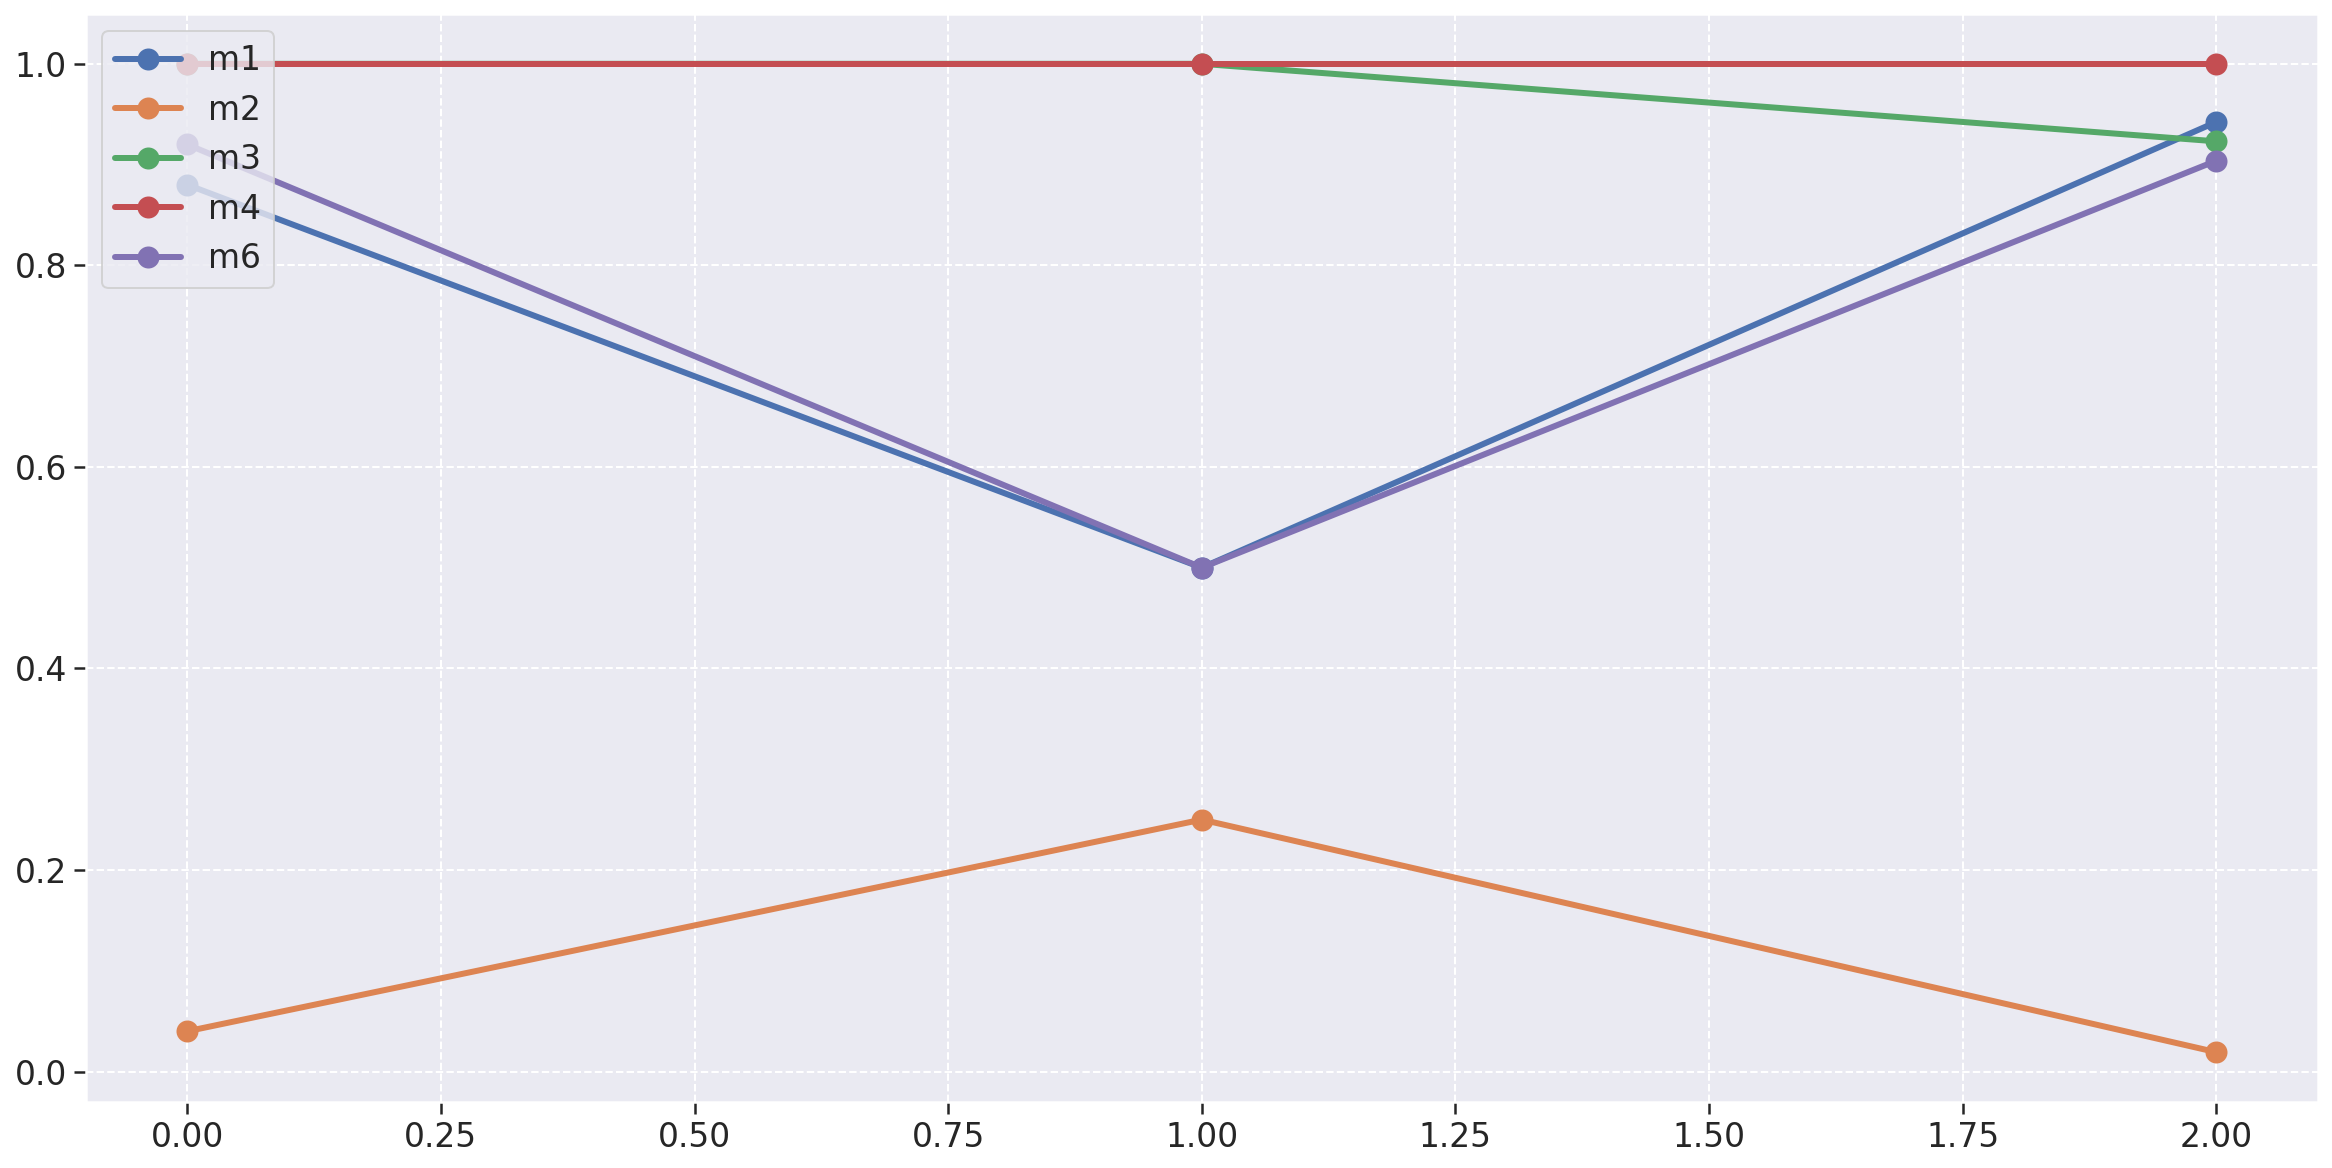

In [368]:
fig = plt.figure(figsize=(20, 10))

plt.plot(frontend_metrics['m1'], linewidth=3, marker='o', markersize=10, label='m1')
plt.plot(frontend_metrics['m2'], linewidth=3, marker='o', markersize=10, label='m2')
plt.plot(frontend_metrics['m3'], linewidth=3, marker='o', markersize=10, label='m3')
plt.plot(frontend_metrics['m4'], linewidth=3, marker='o', markersize=10, label='m4')
plt.plot(frontend_metrics['m6'], linewidth=3, marker='o', markersize=10, label='m6')

plt.legend(loc='upper left')

### Sub characteristic aggregation

- You must do this for each of your repositories

In [369]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

pm4 = 0.3
pm6 = 0.7

archives_metrics['code_quality'] = ((archives_metrics['m1']*pm1)+(archives_metrics['m2']*pm2)+(archives_metrics['m3']*pm3))*psc1
profile_metrics['code_quality'] = ((profile_metrics['m1']*pm1)+(profile_metrics['m2']*pm2)+(profile_metrics['m3']*pm3))*psc1
frontend_metrics['code_quality'] = ((frontend_metrics['m1']*pm1)+(frontend_metrics['m2']*pm2)+(frontend_metrics['m3']*pm3))*psc1

archives_metrics['testing_status'] = ((archives_metrics['m4']*pm4)+(archives_metrics['m6']*pm6))*psc2
profile_metrics['testing_status'] = ((profile_metrics['m4']*pm4)+(profile_metrics['m6']*pm6))*psc2
frontend_metrics['testing_status'] = ((frontend_metrics['m4']*pm4)+(frontend_metrics['m6']*pm6))*psc2

## Code Quality 

No handles with labels found to put in legend.


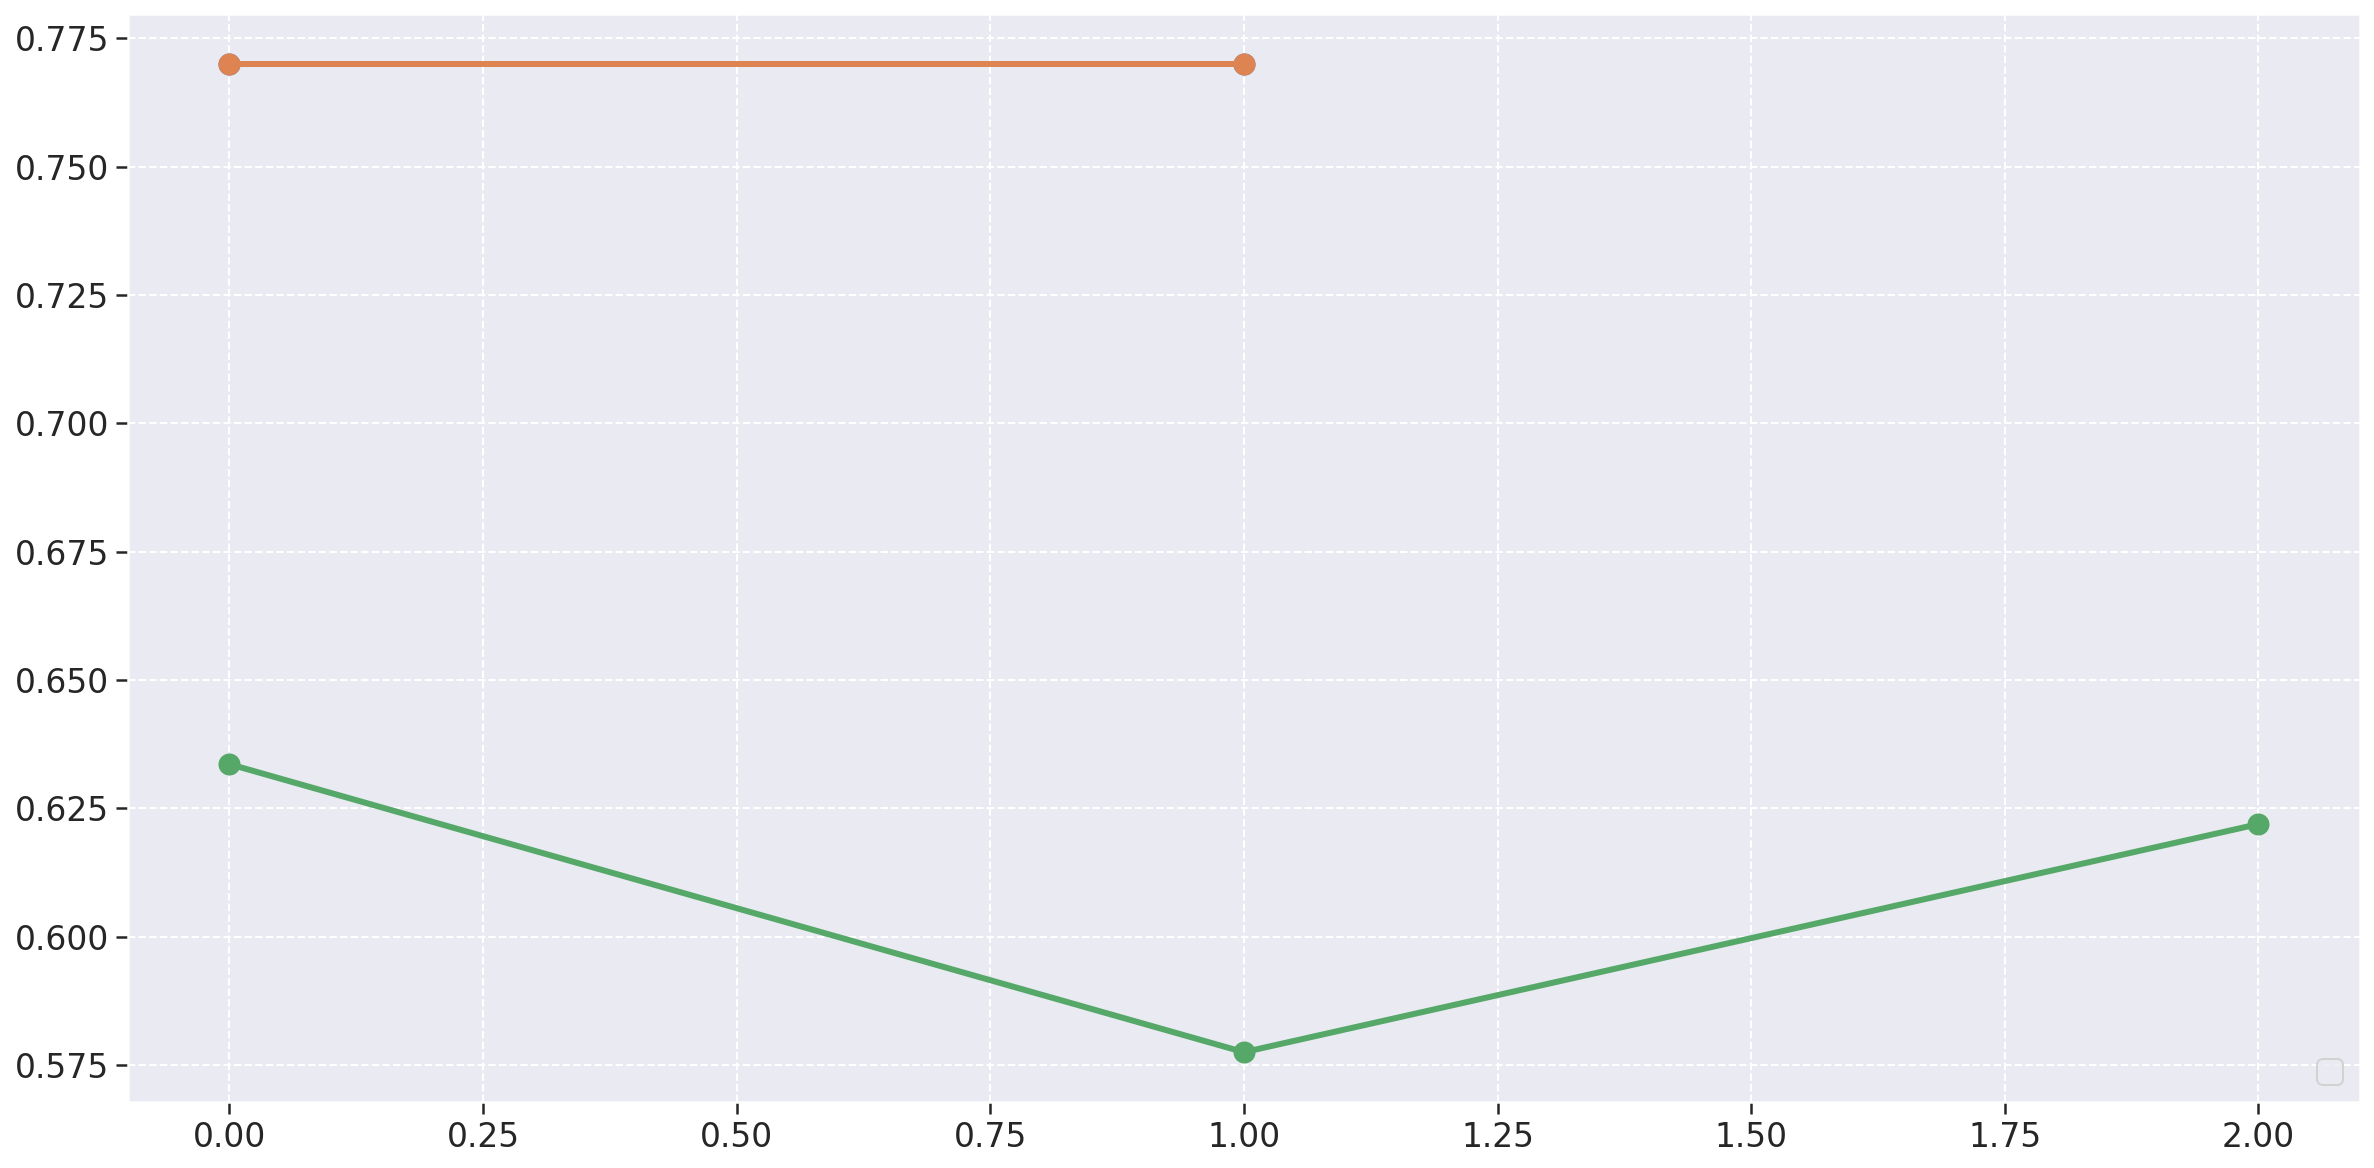

In [370]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(profile_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(frontend_metrics['code_quality'], linewidth=3, marker='o', markersize=10)

plt.legend(loc='lower right')

## Testing Status

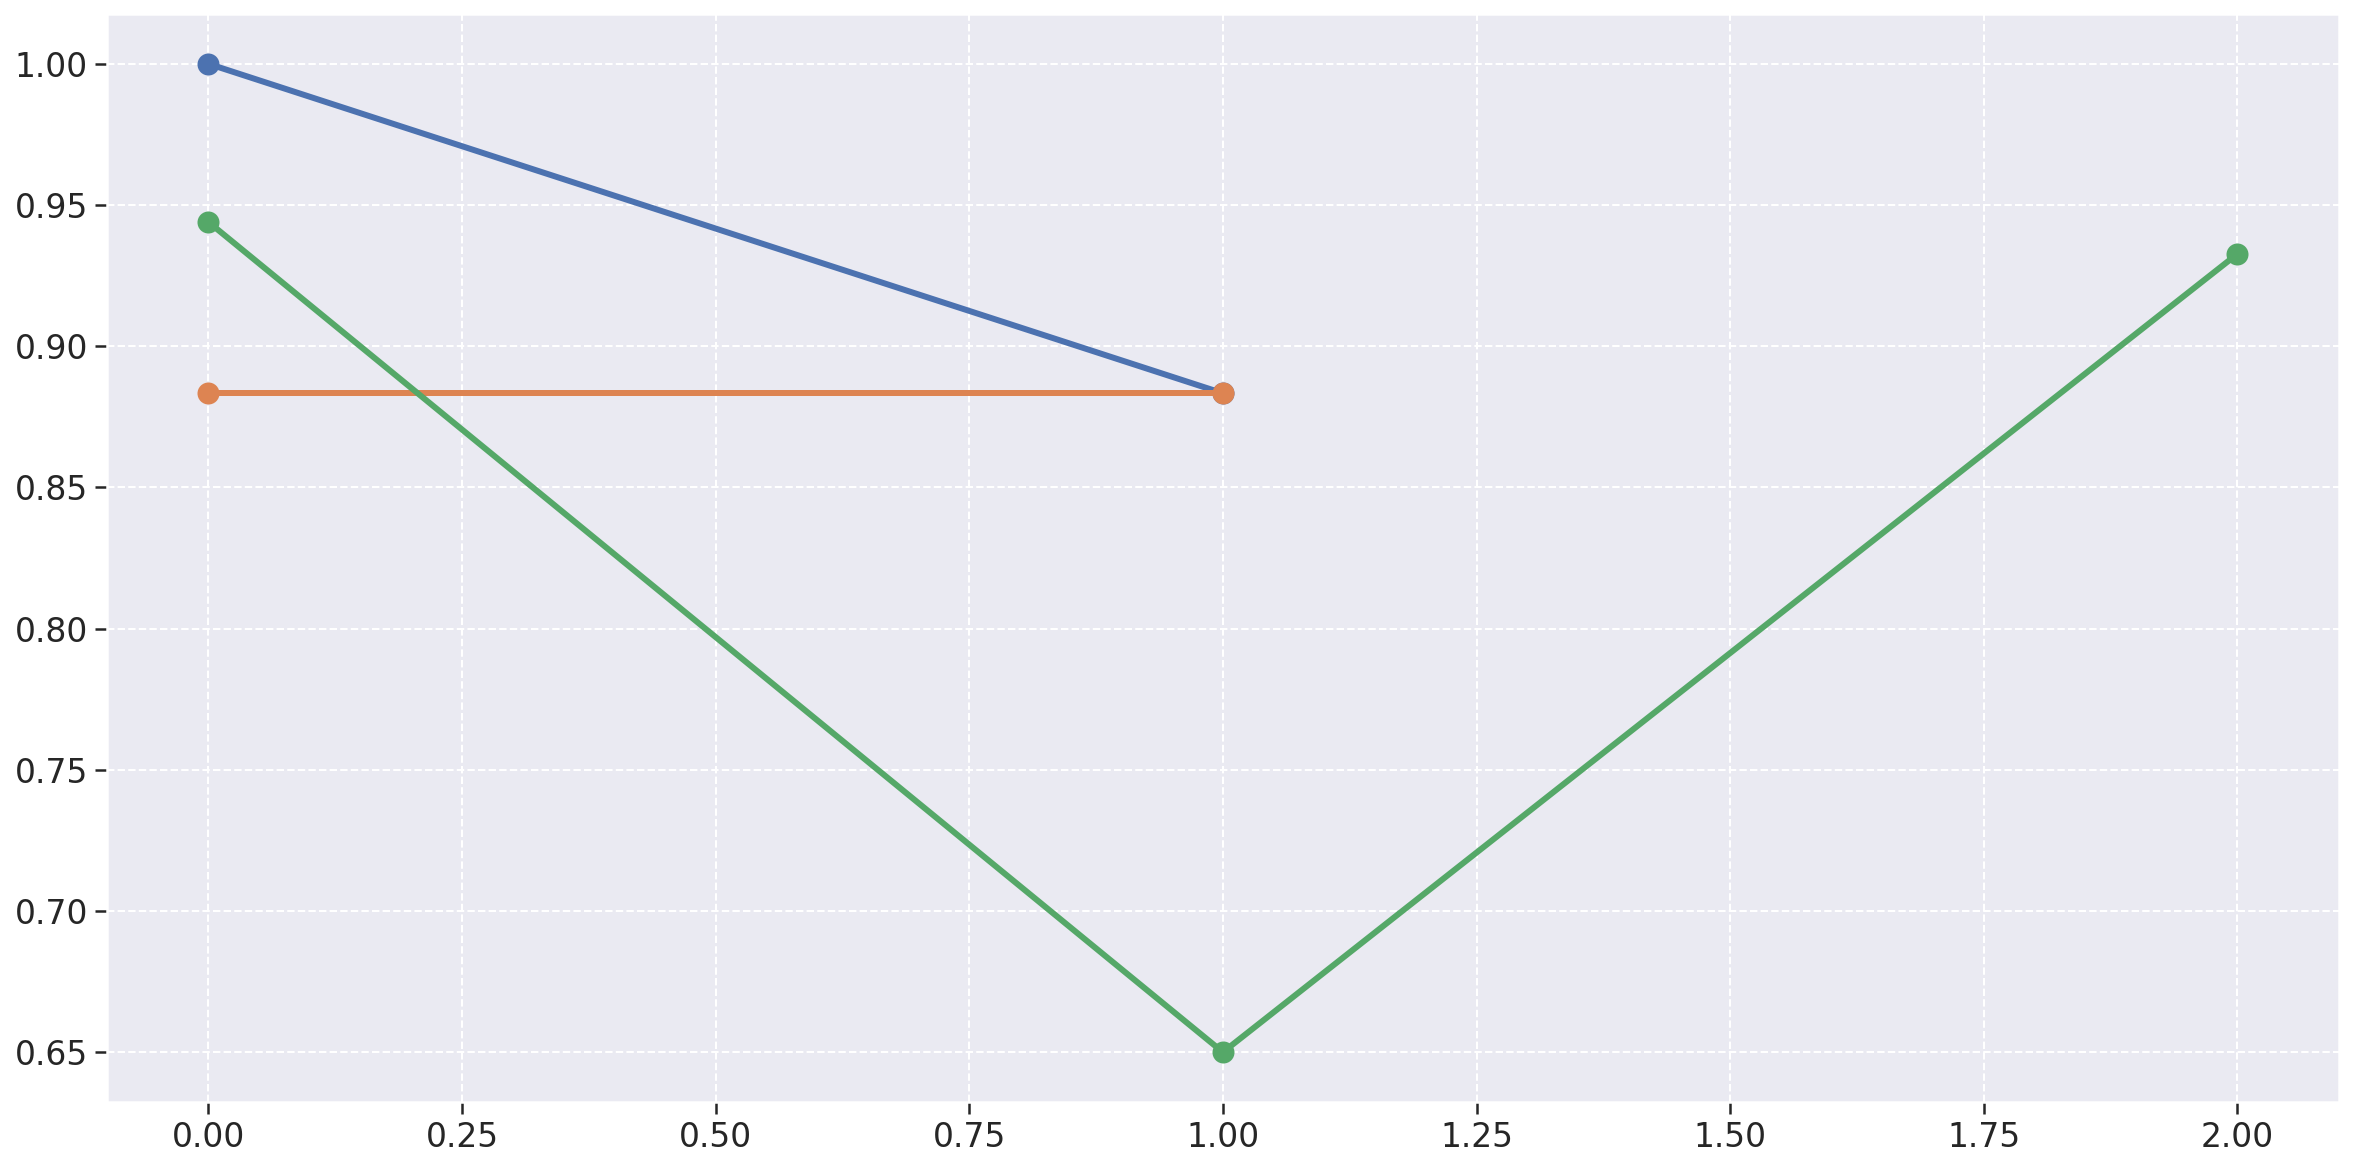

In [371]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['testing_status'], linewidth=3, marker='o', markersize=10)
plt.plot(profile_metrics['testing_status'], linewidth=3, marker='o', markersize=10)
plt.plot(frontend_metrics['testing_status'], linewidth=3, marker='o', markersize=10)

## All Metrics

In [372]:
metrics_df = pd.concat([archives_metrics, profile_metrics, frontend_metrics], ignore_index=True)

metrics_df['maintainability'] = metrics_df['code_quality'] * pc1
metrics_df['Reliability'] = metrics_df['testing_status'] * pc2
metrics_df['total'] = metrics_df['maintainability'] + metrics_df['Reliability']

In [373]:
metrics_df

,m1,m2,m3,m4,m6,repository,version,ncloc,code_quality,testing_status,maintainability,Reliability,total
0,1.000000,0.333333,1.000000,1.0,1.000000,Archives,03-10-2021-15-47,239,0.770000,1.000000,0.385000,0.500000,0.885000
1,1.000000,0.333333,1.000000,1.0,0.833333,Archives,13-09-2021-15-00,109,0.770000,0.883333,0.385000,0.441667,0.826667
2,1.000000,0.333333,1.000000,1.0,0.833333,Profile,03-10-2021-15-48,112,0.770000,0.883333,0.385000,0.441667,0.826667
3,1.000000,0.333333,1.000000,1.0,0.833333,Profile,13-09-2021-14-00,112,0.770000,0.883333,0.385000,0.441667,0.826667
4,0.880000,0.040000,1.000000,1.0,0.920000,Frontend,03-10-2021-15-49,1417,0.633600,0.944000,0.316800,0.472000,0.788800
5,0.500000,0.250000,1.000000,1.0,0.500000,Frontend,13-09-2021-20-00,48,0.577500,0.650000,0.288750,0.325000,0.613750
6,0.942308,0.019231,0.923077,1.0,0.903846,Frontend,17-10-2021-15-30,4874,0.621923,0.932692,0.310962,0.466346,0.777308


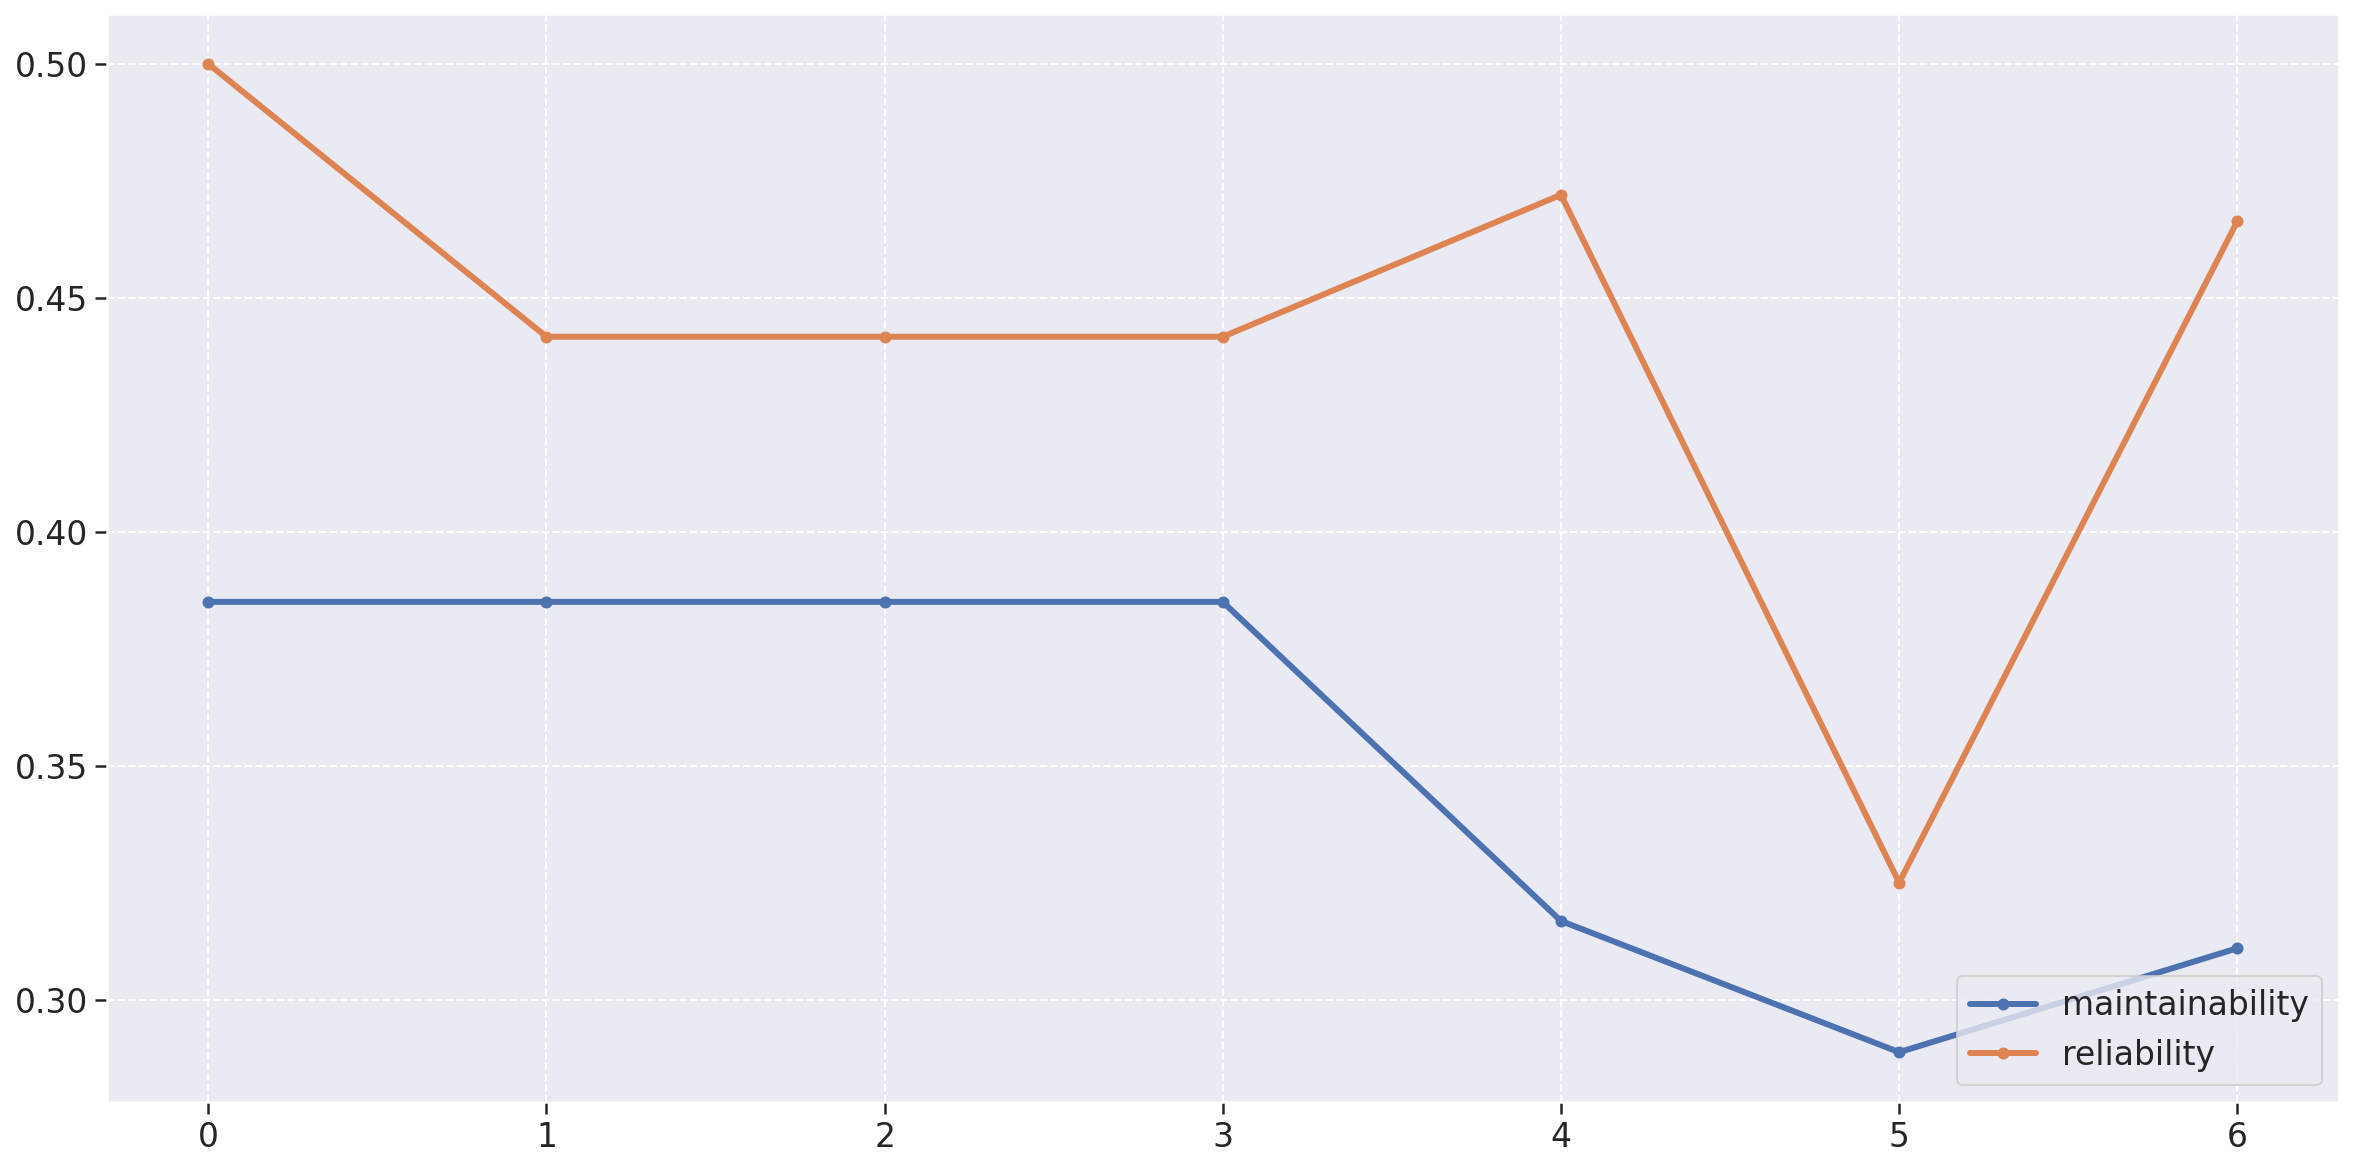

In [374]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['maintainability'], linewidth=3, marker='o', markersize=5, label='maintainability')
plt.plot(metrics_df['Reliability'], linewidth=3, marker='o', markersize=5, label='reliability')

plt.legend(loc='lower right')

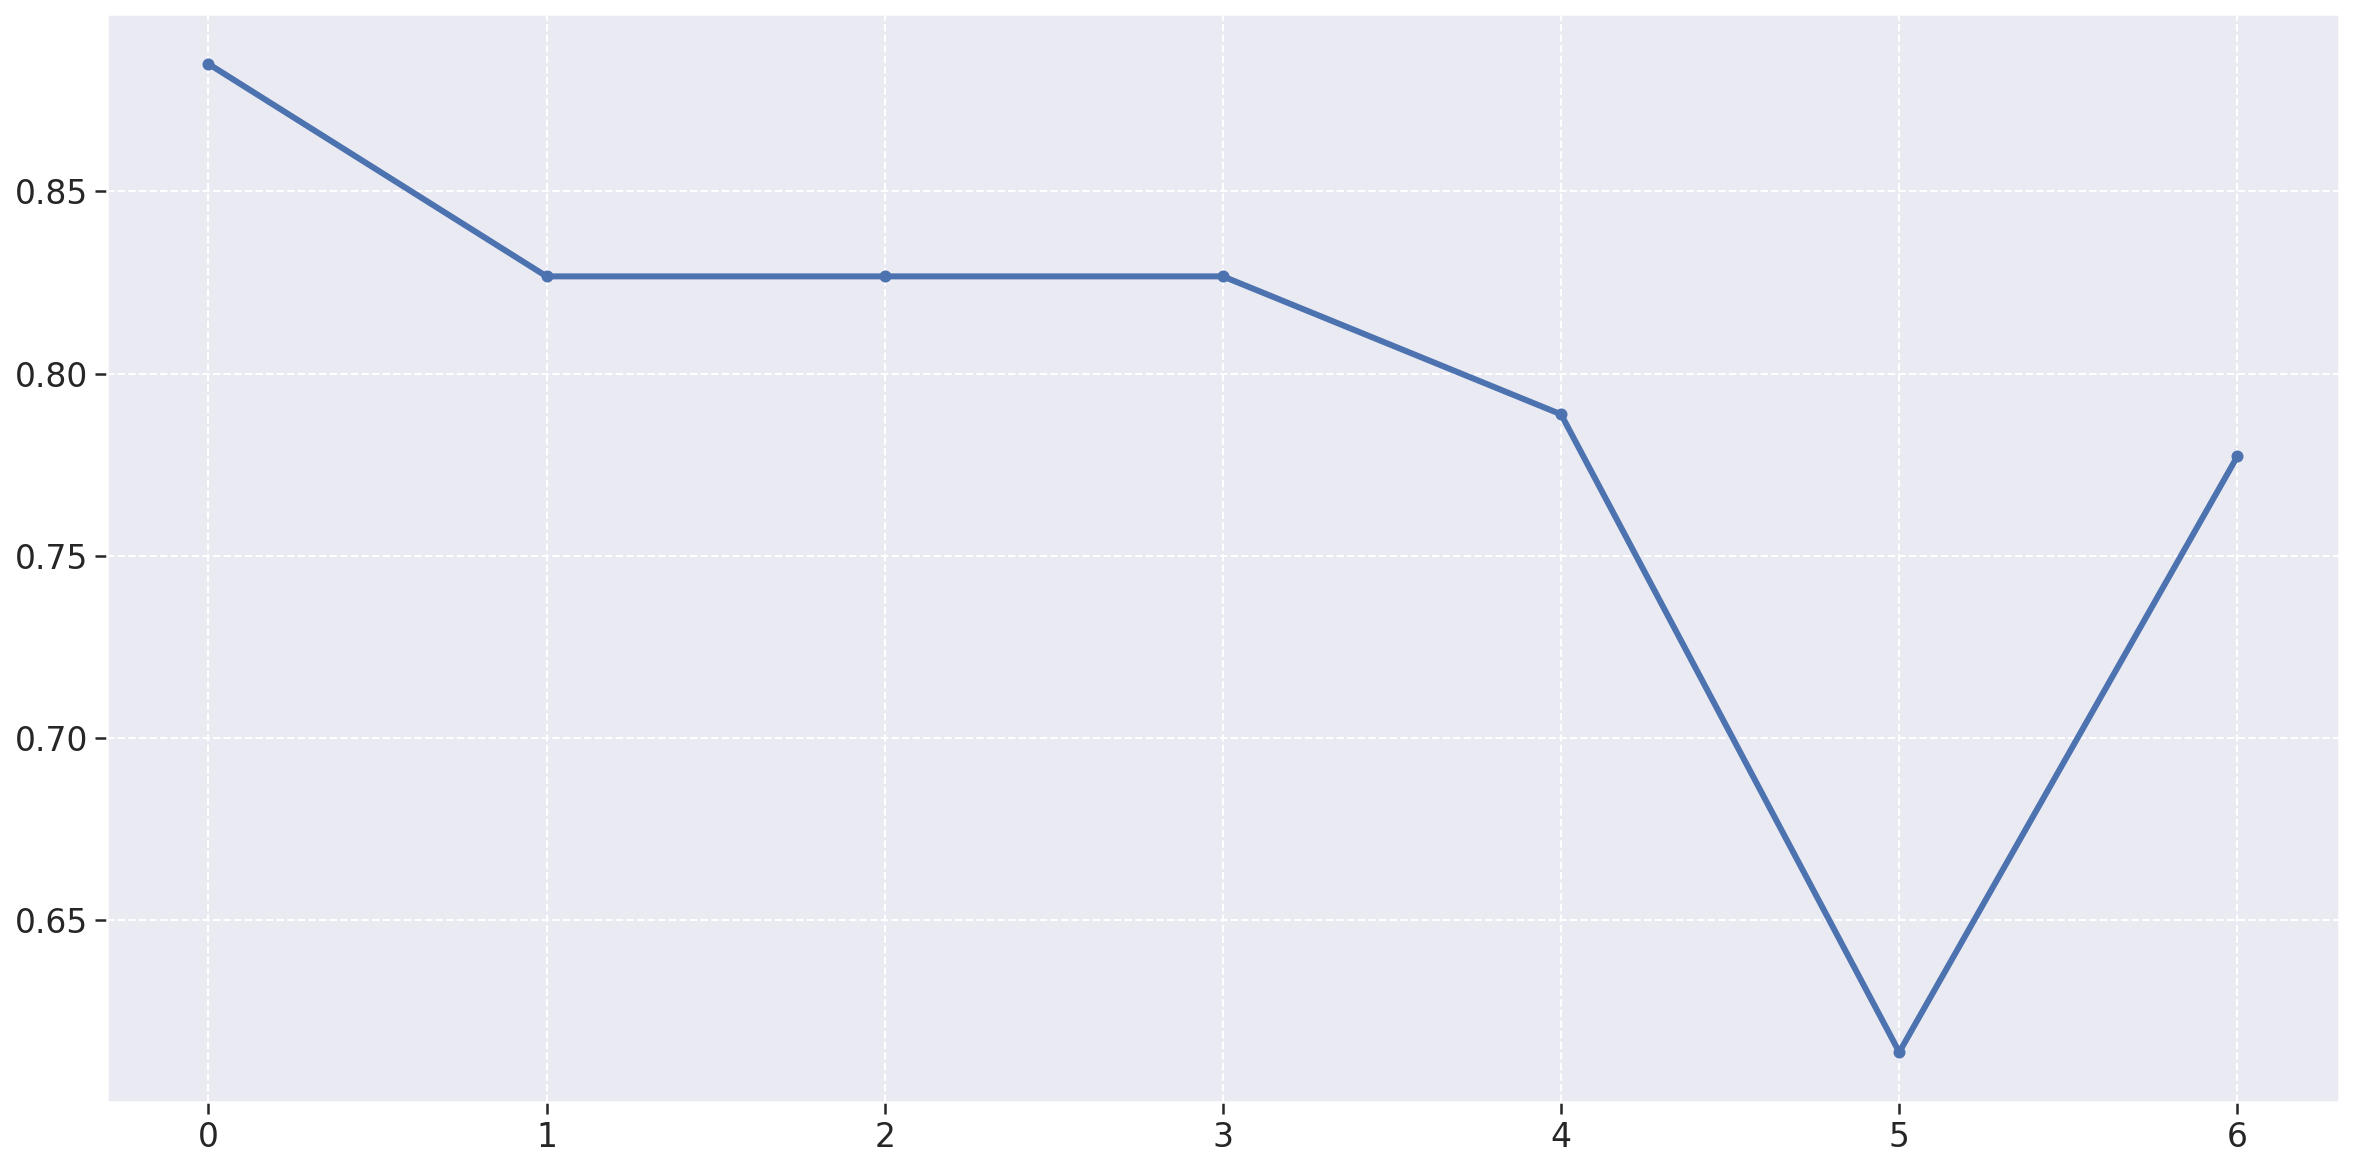

In [375]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['total'], linewidth=3, marker='o', markersize=5)

# Descriptive Statistics

In [ ]:
# boxplot
# histograma
# heatmap

# Archives

## Histograms

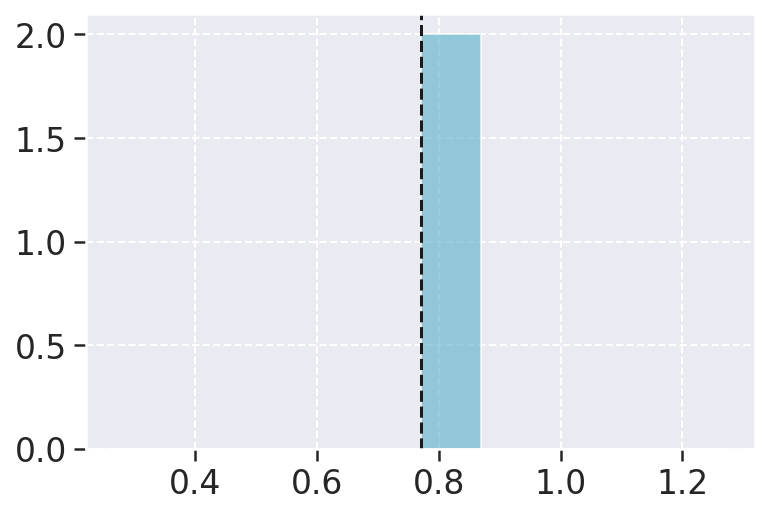

In [378]:
plt.hist(archives_metrics['code_quality'], bins=10, color='c', alpha=0.65)
plt.axvline(archives_metrics['code_quality'].mean(), color='k', linestyle='dashed')

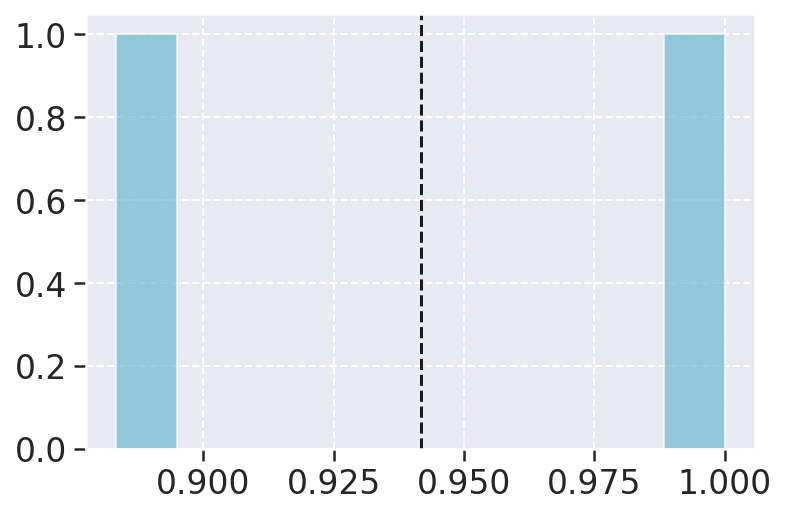

In [379]:
plt.hist(archives_metrics['testing_status'], bins=10, color='c', alpha=0.65)
plt.axvline(archives_metrics['testing_status'].mean(), color='k', linestyle='dashed')

# Profile

# Frontend

# Metrics to file

In [83]:
metrics_df.to_excel('./data/fga-eps-mds-2021_1-PC-GO1-TO-DATASET-ANALYSIS_DATE.xlsx', index = False)
metrics_df.to_csv('./data/fga-eps-mds-2021_1-PC-GO1-TO-DATASET-ANALYSIS_DATE.csv', index = False)